## Part 1: Data preprocessing

Dataset link: https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv

### Importing the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('insurance.csv')

### Data exploration

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.select_dtypes(include = 'object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [7]:
len(dataset.select_dtypes(include = 'object').columns)

3

In [8]:
dataset.select_dtypes(include = ['int64', 'float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [9]:
len(dataset.select_dtypes(include = ['int64', 'float64']).columns)

4

In [10]:
# statistical summary
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Dealing with missing values

In [11]:
dataset.isnull().values.any()

False

In [12]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Encoding the categorical data

In [16]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [17]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [18]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [19]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
# one hot encoding
dataset = pd.get_dummies(data = dataset, drop_first = True)

In [66]:
# Convert boolean values to 1 and 0
dataset = dataset.astype(int)

In [68]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,1,0,1,0,0
1334,18,31,0,2205,0,0,0,0,0
1335,18,36,0,1629,0,0,0,1,0
1336,21,25,0,2007,0,0,0,0,1


In [69]:
dataset.shape

(1338, 9)

### Correlation matrix

In [70]:
dataset_2 = dataset.drop(columns = 'charges')

In [71]:
dataset_2

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,0,1,0,0,1
1,18,33,1,1,0,0,1,0
2,28,33,3,1,0,0,1,0
3,33,22,0,1,0,1,0,0
4,32,28,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30,3,1,0,1,0,0
1334,18,31,0,0,0,0,0,0
1335,18,36,0,0,0,0,1,0
1336,21,25,0,0,0,0,0,1


<Axes: title={'center': 'Correlation with Charges'}>

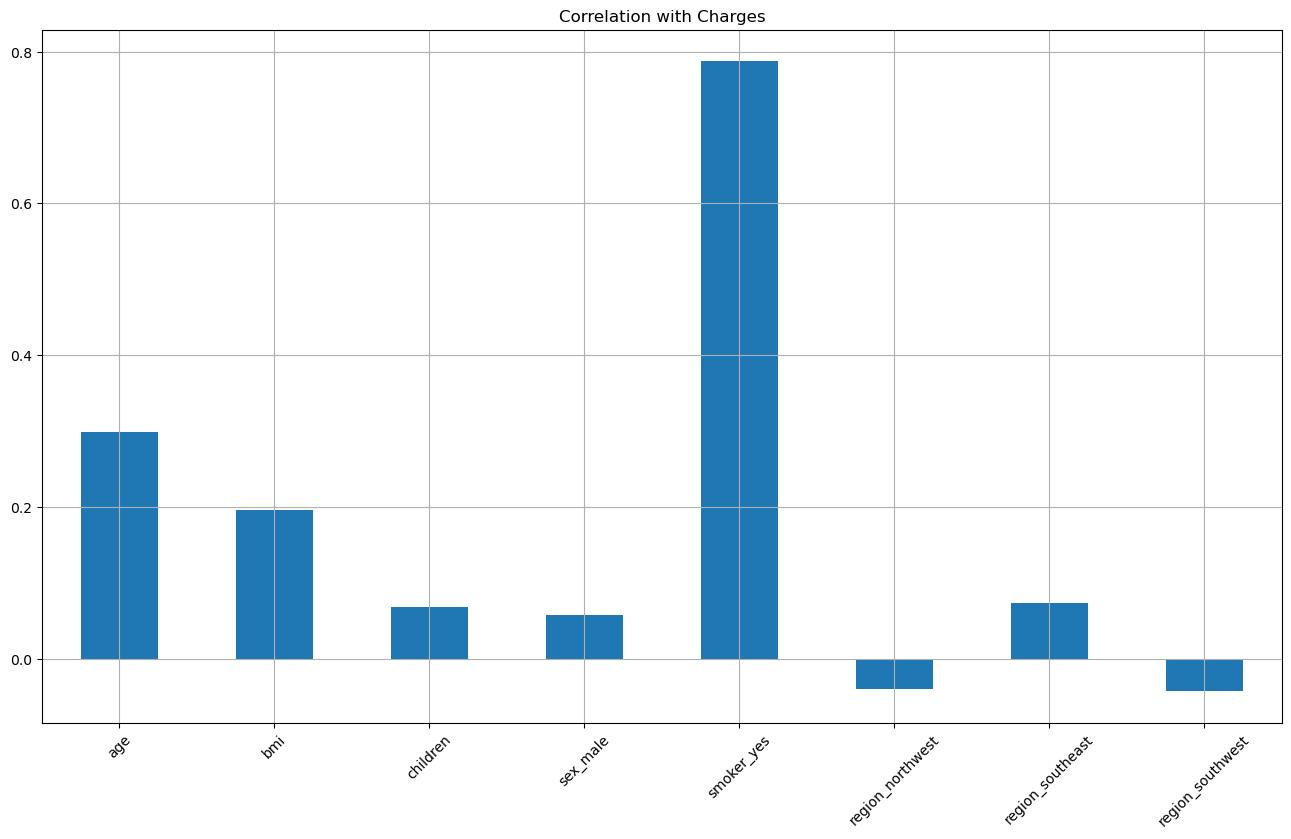

In [72]:
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize=(16,9), title='Correlation with Charges', rot=45, grid=True
)

In [73]:
corr = dataset.corr()

<Axes: >

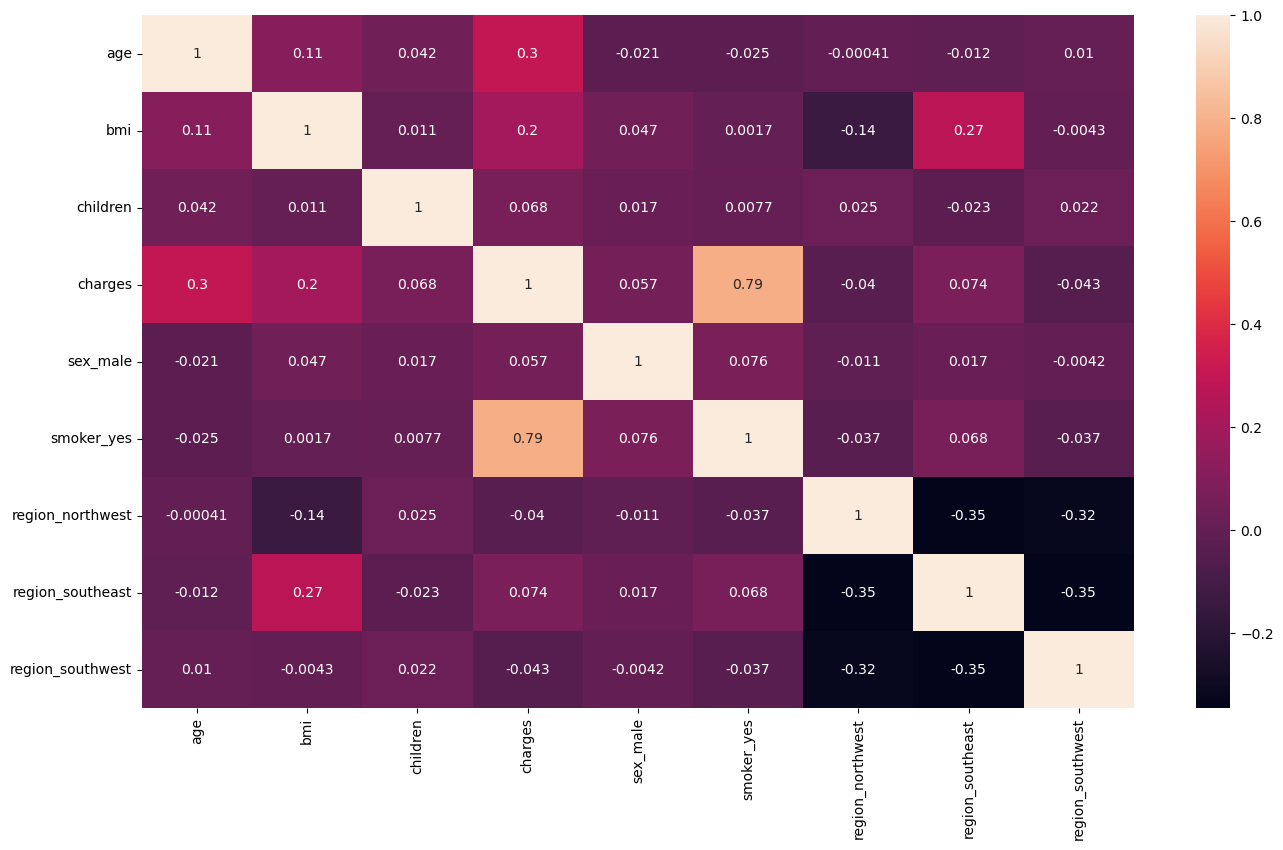

In [74]:
# heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True)

### Splitting the dataset

In [75]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [76]:
# matrix of features / independent variables
x = dataset.drop(columns='charges')

In [77]:
# target / dependent variable
y = dataset['charges']

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [79]:
x_train.shape

(1070, 8)

In [80]:
y_train.shape

(1070,)

In [81]:
x_test.shape

(268, 8)

In [82]:
y_train.shape

(1070,)

### Feature scaling

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [84]:
x_train

array([[-0.14853305,  0.60616004,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.60616004, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.92836135,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.84374587, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.7672607 , -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97145047, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [85]:
x_test

array([[ 0.91668389, -0.03824259, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.19934324, -0.06565939, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.57276398,  0.76087642, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.57276398, -0.89219519, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429,  1.41166332,  1.58741222, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711, -1.00484653,  1.58741222, ..., -0.55791981,
        -0.6155209 , -0.58526447]])

## Part 2: Building the model

### 1) Multiple linear regression

In [86]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)

LinearRegression()

In [87]:
y_pred = regressor_lr.predict(x_test)

In [88]:
y_pred

array([11261.20407824,  9514.7612412 , 38175.5902538 , 16303.28965236,
        7072.71768454,  4003.44637585,  1636.90279216, 14434.43677177,
        9123.23010109,  7666.75356146,  4671.87871582, 10384.97796467,
        8658.02426499,  3844.11155066, 27939.47856581, 10822.83178362,
       11353.17740108,  6104.80446511,  8330.77077607, 27087.86936293,
       33569.48012943, 14255.54096161, 11605.49646469, 32020.19727135,
        4056.36876807,  9304.45550074,  1155.08418679,  9962.82646636,
        3672.11048721, 10442.32641112,  8959.77518389, 40186.6608778 ,
       15705.51068495, 13929.41103056, 24764.05651047,  5017.10103749,
       12705.47415762, 30801.97390278, 33477.94709799,  3722.92170188,
        3855.82432455,  3819.73253851, 30566.88735936, 39371.05155173,
       27681.17395766,  5039.58670901, 10487.37580297,  7898.14644386,
        3445.535632  , 10039.3105778 ,  5589.19324771,  3296.02024006,
       33192.89649863, 38640.98971256, 15890.07627326,  7177.45897274,
      

In [89]:
from sklearn.metrics import r2_score

In [90]:
r2_score(y_test, y_pred)

0.7995787849960008

### 2) Random forest regression

In [91]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [92]:
y_pred = regressor_rf.predict(x_test)

In [93]:
y_pred

array([10519.42      ,  9082.62      , 44522.34      , 13369.22      ,
       10540.18      , 12314.72      ,  2173.265     , 13543.75      ,
        7170.08      ,  6019.21      ,  7380.91      , 19556.05      ,
       10791.275     ,  6247.89      , 21020.09      , 13066.25      ,
       14017.47      ,  5985.27      ,  6480.14      , 33855.84      ,
       23994.12      , 13892.99      , 10851.19      , 27085.8       ,
        3613.06033333,  6333.09      ,  5944.78      ,  8845.57      ,
        3804.1       , 12577.56      ,  8110.07      , 48040.87      ,
       13863.24      , 10743.51      , 17563.6       ,  3701.26      ,
        9293.92      , 37866.12333333, 41191.84      ,  7007.49      ,
       10346.99      ,  3546.28      , 21300.47      , 47759.3       ,
       36570.03333333,  6075.23      , 13962.        ,  6750.29      ,
        5433.92      , 13803.35      ,  3332.47      , 14957.65      ,
       26877.44      , 49553.07      , 11714.92      ,  7747.73      ,
      

In [94]:
r2_score(y_test, y_pred)

0.8809843346889475

### 3) XGBoost regression

In [95]:
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [96]:
y_pred = regressor_xgb.predict(x_test)

In [97]:
y_pred

array([12164.097 , 10182.505 , 43608.54  , 13941.176 , 10506.545 ,
        8875.231 ,  2312.8115, 13505.931 ,  7171.8306,  6749.4243,
        6596.3223, 14648.402 ,  9430.05  ,  5905.2017, 19850.584 ,
       12667.565 , 14148.318 ,  5504.695 ,  7107.8125, 34356.305 ,
       24212.043 , 15887.722 , 12014.389 , 28230.873 ,  3301.626 ,
        6433.159 ,  5919.296 ,  7412.5845,  4428.863 , 10480.007 ,
        7471.9097, 46637.56  , 13969.809 , 11528.199 , 16853.336 ,
        4622.6772,  9555.286 , 38468.617 , 40999.168 ,  3383.031 ,
        8752.184 ,  4398.2876, 19594.348 , 46702.29  , 36988.71  ,
        5520.3794, 12970.435 ,  7330.198 ,  6168.8745, 12451.154 ,
        3992.8037,  8844.    , 27239.691 , 47166.395 , 11767.446 ,
        4705.569 ,  3844.116 , 11516.781 , 10674.7   , 16812.75  ,
        2479.5332, 46817.465 , 17152.865 , 12187.64  , 11128.895 ,
       10665.113 , 34654.406 , 41958.848 ,  5731.3076,  9369.877 ,
       14380.149 , 12479.202 , 18343.516 , 14073.219 , 14226.8

In [98]:
r2_score(y_test, y_pred)

0.8957458590509094

## Part 3: Predict charges for a new custom

### Example 1

Name: Frank, age: 40, sex: 1, bmi:45.50, children:4, smoker:1, region:northeast

In [99]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [100]:
frank_obs = [[40, 45.5, 4, 1, 1, 0, 0, 0]]

In [101]:
regressor_xgb.predict(sc.transform(frank_obs))

/Users/neekhilkumar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([44468.777], dtype=float32)

### Example 2

Name: Sara, age:19, bmi:27.9, children:0, sex:female, smoker:no, region: northwest

In [102]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [103]:
sara_obs = [[19, 27.9, 0, 0, 0, 1, 0, 0]]

In [104]:
sara_obs

[[19, 27.9, 0, 0, 0, 1, 0, 0]]

In [105]:
regressor_xgb.predict(sc.transform(sara_obs))

/Users/neekhilkumar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2484.7576], dtype=float32)

### Convert dataset into new excel

In [106]:
dataset.to_csv("dataset_new.csv") #conver dataset into new excel

### Example 3

#### predict data from excel sheet

In [107]:
example = pd.read_csv("example.csv")
example.head(3)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,0,1,0,0,1
1,18,33.77,1,1,0,0,1,0
2,28,33.00,3,1,0,0,1,0


In [108]:
example_predict = regressor_xgb.predict(sc.transform(example))
example_predict

array([17760.242 ,  4866.1855,  6480.596 ,  6876.4766,  4777.7754,
        4428.863 ,  9837.2705,  7164.1636,  7093.7705, 14013.359 ,
        4211.5166], dtype=float32)

In [109]:
example['charges']= example_predict
example

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0,1,0,0,1,17760.242188
1,18,33.770,1,1,0,0,1,0,4866.185547
2,28,33.000,3,1,0,0,1,0,6480.596191
3,33,22.705,0,1,0,1,0,0,6876.476562
4,32,28.880,0,1,0,1,0,0,4777.775391
5,31,25.740,0,0,0,0,1,0,4428.862793
6,46,33.440,1,0,0,0,1,0,9837.270508
7,37,27.740,3,0,0,1,0,0,7164.163574
8,37,29.830,2,1,0,0,0,0,7093.770508
9,60,25.840,0,0,0,1,0,0,14013.359375


In [110]:
example.to_csv("prediction.csv")

## Part: 4 Save the model

In [111]:
import pickle
# Save the model to a pickle file
with open('regression_model.pkl', 'wb') as model_file:
    pickle.dump(regressor_lr, model_file)

with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(regressor_xgb, model_file)
# Save the model to a pickle file
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(regressor_rf, model_file)
# Save the scaler to a pickle file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(sc, scaler_file)

In [112]:
import joblib

# Save the model to a joblib file
joblib.dump(regressor_lr, 'regression_model.joblib')

# Save the model to a joblib file
joblib.dump(regressor_xgb, 'xgboost_model.joblib')

# Save the model to a joblib file
joblib.dump(regressor_rf, 'random_forest_model.joblib')

# Save the scaler to a joblib file
joblib.dump(sc, 'scaler.joblib')

['scaler.joblib']

## End of Project